testing/realizations/scene\gp-nn\bunny-bm-32-mean.bin


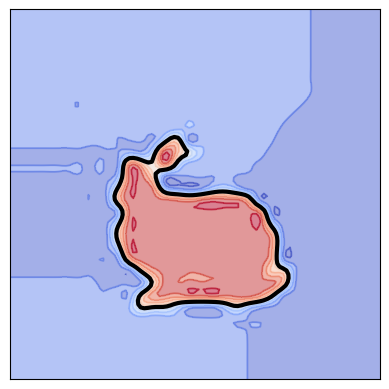

testing/realizations/scene\gp-spsr\bunny-32-mean.bin


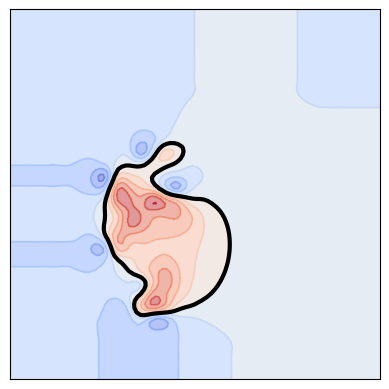

In [13]:
import numpy as np
import imageio
import sys
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
imageio.plugins.freeimage.download()
import scipy.stats as st

from scipy.interpolate import RegularGridInterpolator

def plot_realization(file):
    realization = -np.fromfile(file, dtype=np.float64)

    real_dim = int(np.sqrt(len(realization)))
    realization = np.reshape(realization, (real_dim, real_dim))


    vxs = np.linspace(-10, 10, real_dim)

    interp = RegularGridInterpolator((vxs,vxs), realization, method="cubic")


    xs = np.linspace(-10, 10, 100)
    xx, yy = np.meshgrid(xs,xs)

    interp_real = interp((xx,yy))

    minv = realization.min()
    maxv = realization.max()

    max_extend = np.maximum(np.abs(minv), np.abs(maxv))

    levels = np.concatenate(([-1000], np.linspace(-max_extend, max_extend, 11), [1000]))

    cs = plt.contour(xx, yy, interp_real, vmin=-max_extend, vmax=max_extend, alpha=0.5, levels= levels, cmap="coolwarm")

    plt.contour(xx, yy, interp_real, alpha=1, levels = [0], linewidths=3, colors="black")


    plt.contourf(xx, yy, interp_real, vmin=-max_extend, vmax=max_extend, levels=levels, alpha=0.5, cmap="coolwarm")
    plt.gca().set_aspect("equal")
    plt.yticks([])
    plt.xticks([])
    
    #plt.title(file[10:-8])

    #print(os.path.join("side-view-plots",os.path.split(file)[0]))
    dir = os.path.join("plots",os.path.split(file)[0])
    os.makedirs(dir, exist_ok=True)
    plt.savefig(os.path.join(dir, os.path.basename(file)[:-3] + "png"), dpi=300)
    plt.show()


for file in glob.glob("testing/realizations/scene/*/*32*mean.bin"):
    print(file)
    plot_realization(file)
